In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# single processor validation

In [55]:
x0 = -1
xN = 1
y0 = -1
yN = 1
z0 = -1
zN = 1

nx = ny = nz = 128

nx1 = nx+2
ny1 = ny+2
nz1 = nz+2

dx = (xN-x0)/nx
dy = (yN-y0)/ny
dz = (zN-z0)/nz

x = np.zeros(nx+2)
y = np.zeros(ny+2)
z = np.zeros(nz+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
        y[i] = y0
        z[i] = z0
    elif i==nx+1:
        x[i] = xN
        y[i] = yN
        z[i] = zN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
        y[i] = y0 + dy/2 + dy*(i-1)
        z[i] = z0 + dz/2 + dz*(i-1)

In [56]:
folder_name = "results"
file_name = "theta_single"
t = 0.1
X, Y, Z= np.meshgrid(x, y, z)


solution_single = np.zeros((nx1, ny1, nz1))
for k in range(0, nz1):
    solution_single_k = np.array(pd.read_csv(f"{folder_name}/{file_name}_k{k}.csv", header=None))
    solution_single[:, :, k] = solution_single_k

exact_solution = np.sin(np.pi * X) * np.sin(np.pi * Y) * np.sin(np.pi * Z) * np.exp(-3*np.pi**2 * t) + np.cos(np.pi * X) * np.cos(np.pi * Y) * np.cos(np.pi*Z)
error = exact_solution - solution_single

print(np.sqrt(np.sum(error[1:-1, 1:-1, 1:-1]**2) / nx / ny / nz))

3.3322924792491735e-05


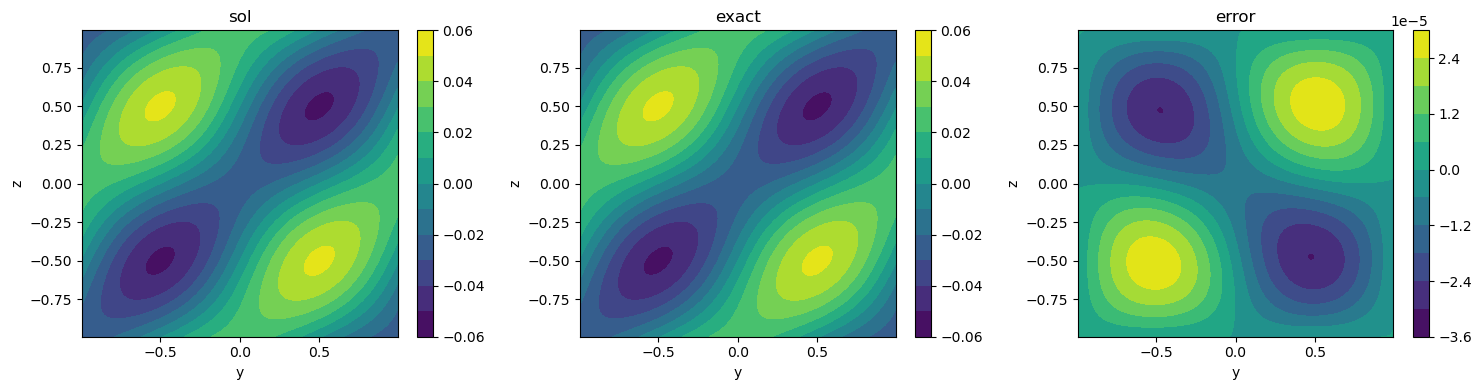

In [57]:
idx = int(nx1/4)
solution_list = [solution_single, exact_solution, error]
# solution_list = [solution_single[idx, :, :], exact_solution[idx, :, :], error[idx, :, :]]

name_list = ["sol", "exact", "error"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):

    X, Y = np.meshgrid(x, y)
    # cs = ax.contourf(X, Y, solution_list[i][:, :, idx], levels=10)
    cs = ax.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], solution_list[i][idx, 1:-1, 1:-1], levels=10)
    # cs = ax.contourf(X, Y, solution_list[i][:, idx, :], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')
    ax.set_xlabel("y")
    ax.set_ylabel("z")

plt.tight_layout()
plt.show()

[2.20234681 2.03443153 2.01342381 2.04364352]


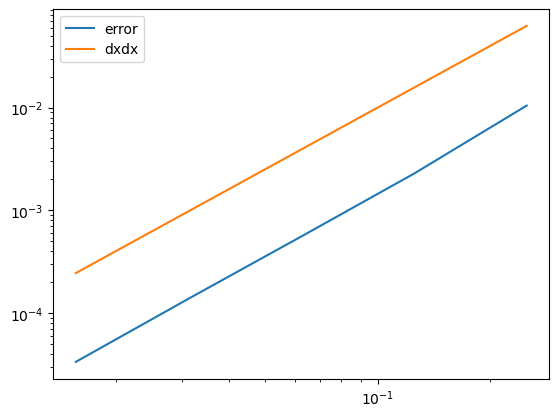

In [53]:
# Dirichlet

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.010457778400075203, 0.00227230688947751, 0.000554679443314953, 0.0001373855673154155, 3.3322924792493056e-05])
error_list = np.array([0.010457778400075203, 0.002272306889477508, 0.000554679443314953, 0.0001373855673154165, 3.3322924792491735e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[2.05915071 2.00555344 2.00078016 2.00917365]


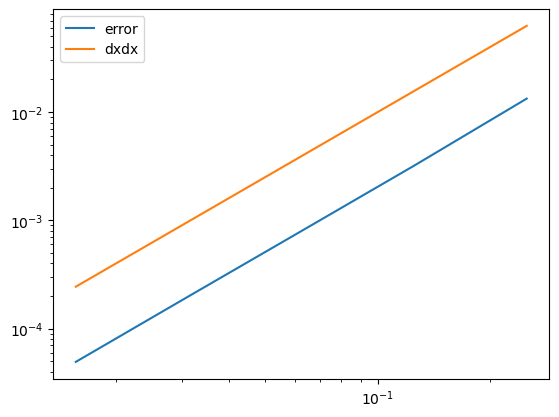

In [315]:
# periodic

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.04001556255792318, 0.006538768905156987, 0.0014456062811251974, 0.00040542687513843835, 0.00012797354240932994]) # dt = 0.0005, 100
error_list = np.array([0.01331205648103189, 0.003194324421170304, 0.0007955129932501736, 0.00019877073135990742, 4.9377705032231284e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Dirichlet) single, many validation

In [41]:
x0 = -1
xN = 1
y0 = -1
yN = 1
z0 = -1
zN = 1

nx = ny = nz = 64
npx = 2
npy = 2
npz = 2
mx = nx/npx
my = ny/npy
mz = nz/npz

nx1 = nx+2
ny1 = ny+2
nz1 = nz+2

dx = (xN-x0)/nx
dy = (yN-y0)/ny
dz = (zN-z0)/nz

x = np.zeros(nx+2)
y = np.zeros(ny+2)
z = np.zeros(nz+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
        y[i] = y0
        z[i] = z0
    elif i==nx+1:
        x[i] = xN
        y[i] = yN
        z[i] = zN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
        y[i] = y0 + dy/2 + dy*(i-1)
        z[i] = z0 + dz/2 + dz*(i-1)

In [42]:
folder_name = "results"
file_name = "theta"

solution = np.zeros((nx1, ny1, nz1))
for k in range(0, nz1):
    solution_k = np.array(pd.read_csv(f"{folder_name}/{file_name}_k{k}.csv", header=None))
    solution[:, :, k] = solution_k

exact_solution = np.zeros((nx1, ny1, nz1))
for k in range(0, nz1):
    solution_single_k = np.array(pd.read_csv(f"{folder_name}/{file_name}_single_k{k}.csv", header=None))
    exact_solution[:, :, k] = solution_single_k

# t = 0.1
# X, Y, Z= np.meshgrid(x, y, z)
# exact_solution = np.sin(np.pi * X) * np.sin(np.pi * Y) * np.sin(np.pi * Z) * np.exp(-3*np.pi**2 * t) + np.cos(np.pi * X) * np.cos(np.pi * Y) * np.cos(np.pi*Z)

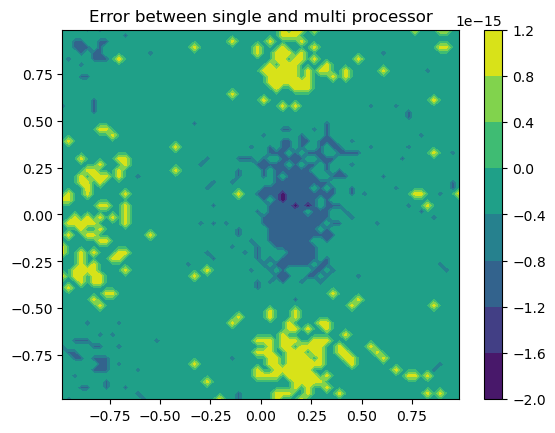

In [43]:
error = exact_solution - solution

idx = 2 # int(nz1/4)
plt.title("Error between single and multi processor")
X, Y = np.meshgrid(x[1:-1], y[1:-1])
plt.contourf(X, Y, error[1:-1, 1:-1, idx])
plt.colorbar()

3.0093524532169603e-28
8.254338826826724e-28
9.133362687588504e-28
1.3908789040425507e-27
1.3678965698629574e-27
1.4596753108967417e-27
1.6182799766640383e-27
1.388382021539681e-27
6.734708637232209e-16


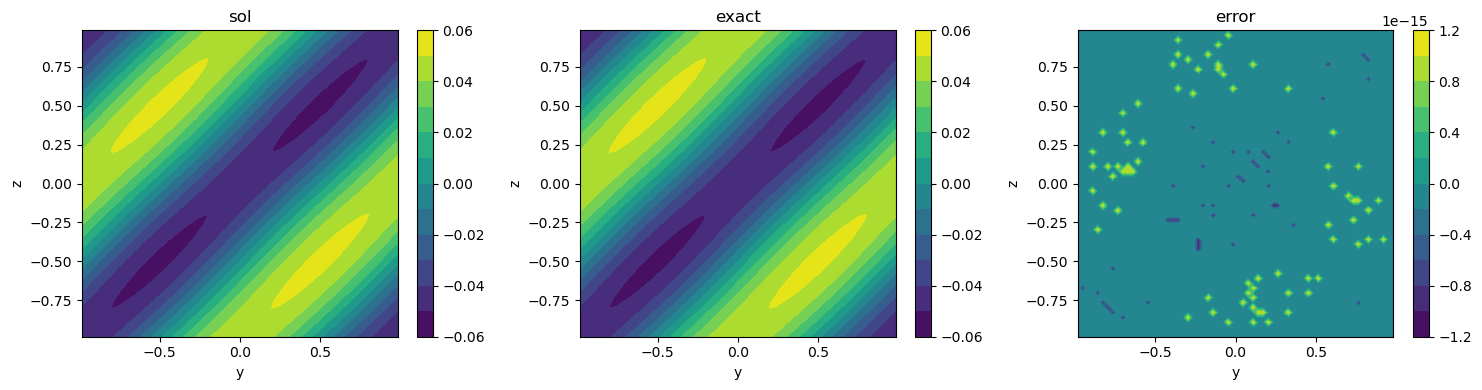

In [44]:
error = exact_solution - solution

for k in range(1, 9):
    print(np.sum(error[1:-1, k, 1:-1]**2))

print(np.sqrt(np.sum(error[1:-1, 1:-1, 1:-1]**2) / nx1 / ny1/ nz1))

idx = int(nx1/4)
solution_list = [solution, exact_solution, error]

name_list = ["sol", "exact", "error"]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):

    X, Y = np.meshgrid(x[1:-1], y[1:-1])
    # cs = ax.contourf(X, Y, solution_list[i][1:-1, 1:-1, idx], levels=10)
    cs = ax.contourf(X, Y, solution_list[i][1:-1, idx, 1:-1], levels=10)
    # cs = ax.contourf(X, Y, solution_list[i][1:-1, idx, 1:-1], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')
    ax.set_xlabel("y")
    ax.set_ylabel("z")

plt.tight_layout()
plt.show()

[1.97434217 1.91073829 1.94882072 2.01060406]


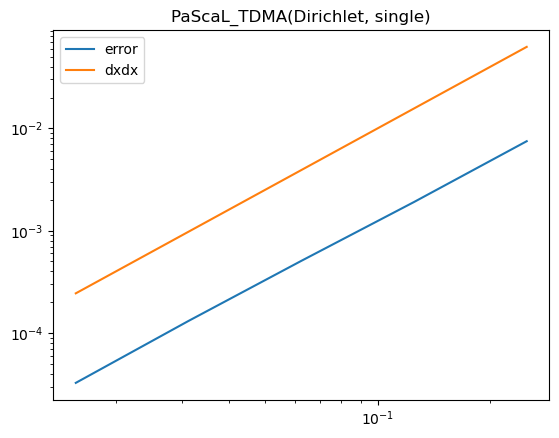

In [30]:
# single

dx_list = np.array([2/8, 2/16, 2/32, 2/64, 2/128])
error_list = np.array([0.0074829770867846914, 0.0019043124272433787, 0.0005064640959203259, 0.00013118831957115208, 3.2556899505224386e-05])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, single)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[2.02513844 2.00247049 2.00030858]


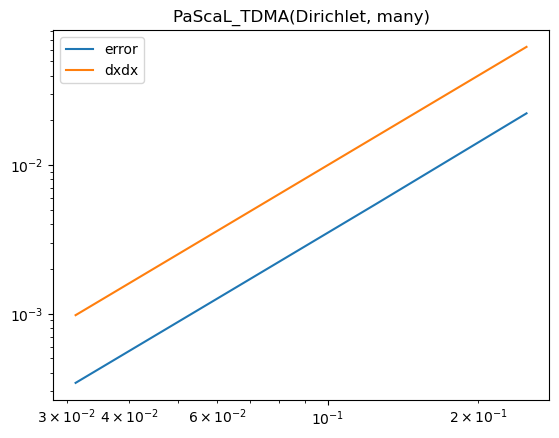

In [392]:
# many

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.02230740440528085, 0.005480518223591115, 0.001367785340273494, 0.00034187320253319825])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, many)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Dirichlet) single, many Performence

In [ ]:
# single
times_64 = np.array([1061, 1106, , 635])
times_128 = np.array([10211, , , 3436])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_64 = times_64[0] / times_64
speedup_128 = times_128[0] / times_128

# efficiency 계산
efficiency_64 = speedup_64 / procs
efficiency_128 = speedup_128 / procs

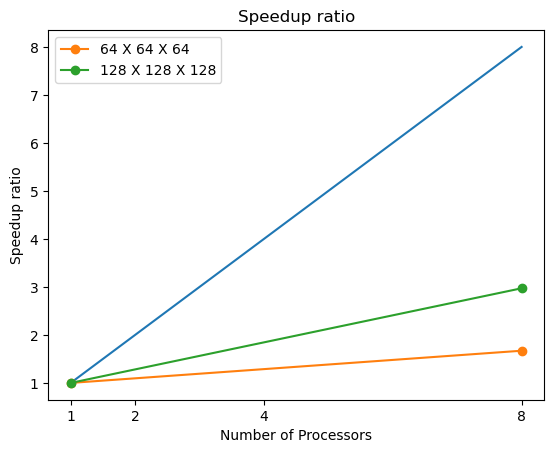

In [41]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_64, "o-", label="64 X 64 X 64")
plt.plot(procs, speedup_128, "o-", label="128 X 128 X 128")
plt.legend()

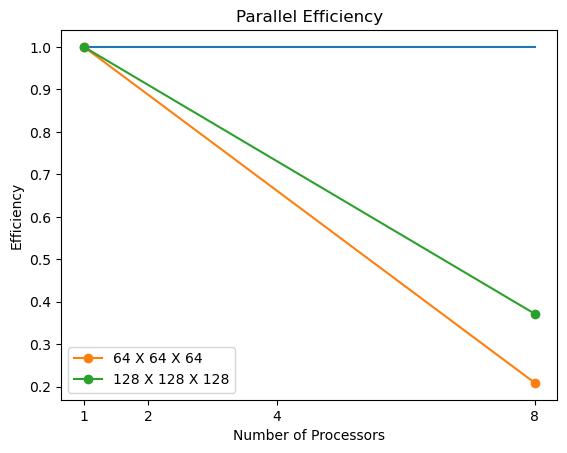

In [42]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_64, "o-", label="64 X 64 X 64")
plt.plot(procs, efficiency_128, "o-", label="128 X 128 X 128")
plt.legend()

In [ ]:
# many
times_1024 = np.array([2857, 1793, 974, 597])
times_2048 = np.array([13103, 7360, 4308, 3036])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_1024 = times_1024[0] / times_1024
speedup_2048 = times_2048[0] / times_2048

# efficiency 계산
efficiency_1024 = speedup_1024 / procs
efficiency_2048 = speedup_2048 / procs

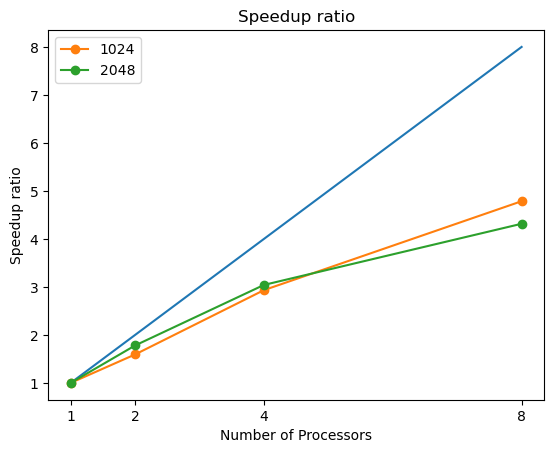

In [412]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_1024, "o-", label="1024")
plt.plot(procs, speedup_2048, "o-", label="2048")
plt.legend()

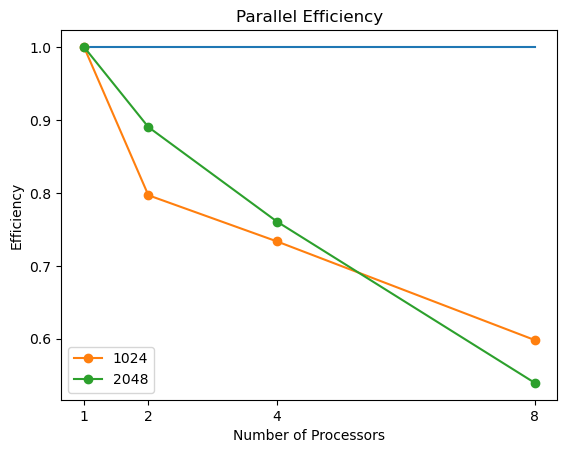

In [413]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_1024, "o-", label="1024")
plt.plot(procs, efficiency_2048, "o-", label="2048")
plt.legend()

# PaScaL_TDMA (Periodic) single, many validation

In [455]:
x0 = -1
xN = 1
y0 = -1
yN = 1

nx = 8
ny = 8

nx1 = nx+2
ny1 = ny+2

npx = 2
npy = 2 

mx = nx/npx
my = ny/npy

dx = (xN-x0)/nx
dy = (yN-y0)/ny

x = np.zeros(nx+2)
y = np.zeros(ny+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
    elif i==nx+1:
        x[i] = xN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
for j in range(ny+2):
    if j==0:
        y[j] = y0
    elif j==ny+1:
        y[j] = yN
    else:
        y[j] = y0 + dy/2 + dy*(j-1)

In [456]:
folder_name = "results"
file_name = "theta"
n_step = 1

solution = np.zeros((ny+2, nx+2))
for j in range(npy):
    for i in range(npx):
        temp = np.array(pd.read_csv(f"{folder_name}/{file_name}_{j}{i}.csv", header=None))
        
        j_idx_sta = int(j*mx) + 1
        j_idx_end = int((j+1)*mx) + 1
        i_idx_sta = int(i*mx) + 1 
        i_idx_end = int((i+1)*mx) + 1
        
        solution[j_idx_sta:j_idx_end, i_idx_sta:i_idx_end] = temp[1:-1, 1:-1]

# exact_solution = np.array(pd.read_csv(f"{folder_name}/{file_name}_single.csv", header=None))

X, Y = np.meshgrid(x, y)

t = 1
exact_solution = np.zeros((ny+2, nx+2))
for j in range(0, ny+2):
    for i in range(0, nx+2):
        exact_solution[i, j] = np.cos(np.pi*x[i])*np.cos(np.pi*y[j]) + np.sin(np.pi*x[i])*np.sin(np.pi*y[j]) * np.exp(-2*np.pi**2 * t)

# folder_name = "results"
# file_name = "theta"
# temp00 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{0}{0}{n_step}.csv", header=None))
# temp10 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{1}{0}{n_step}.csv", header=None))
# temp01 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{0}{1}{n_step}.csv", header=None))
# temp11 = np.array(pd.read_csv(f"{folder_name}/{file_name}_{1}{1}{n_step}.csv", header=None))
# temp00[:, -1] - temp01[:, 1], temp00[:, -2] - temp01[:, 0], temp10[:, -1] - temp11[:, 1], temp10[:, -2] - temp11[:, 0]

0.02248005980768629


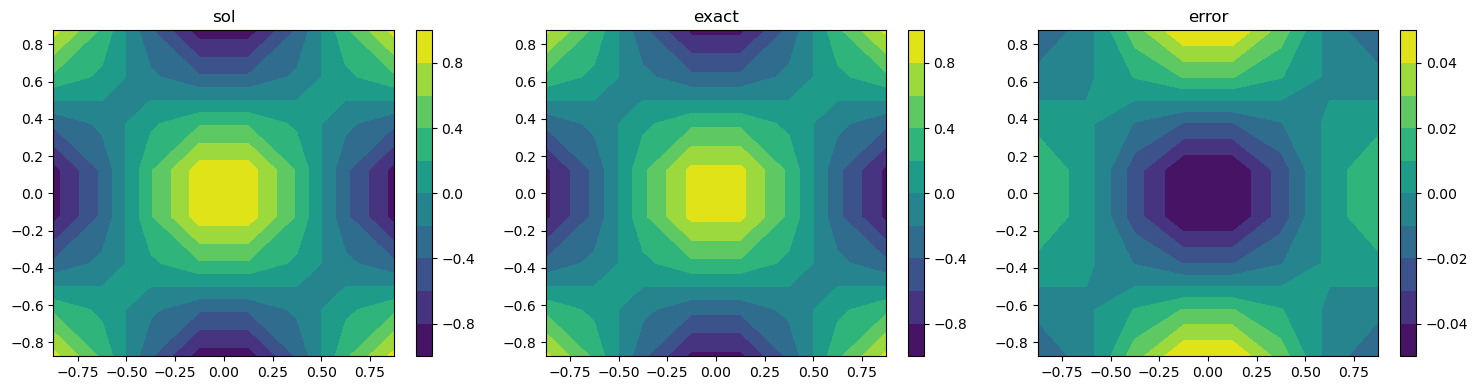

In [457]:
error = exact_solution[1:-1, 1:-1] - solution[1:-1, 1:-1]
solution_list = [solution[1:-1, 1:-1], exact_solution[1:-1, 1:-1], error]
name_list = ["sol", "exact", "error"]
print(np.sqrt(np.sum(error**2) / nx / ny))

# plot --------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1행 3열 subplot
for i, ax in enumerate(axes):
    cs = ax.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], solution_list[i], levels=10)
    fig.colorbar(cs, ax=ax)
    ax.set_title(f'{name_list[i]}')

plt.tight_layout()
plt.show()

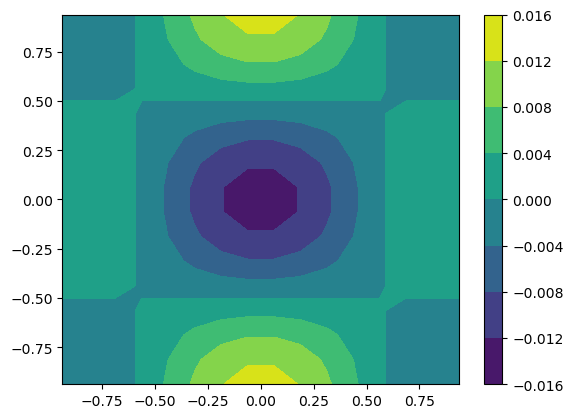

In [452]:
error = exact_solution[1:-1, 1:-1] - solution[1:-1, 1:-1]

#plt.title("Error between single processor and multi processor")
plt.contourf(X[1:-1, 1:-1], Y[1:-1, 1:-1], error)
plt.colorbar()

[2.05780541 2.01238312 2.00294116]


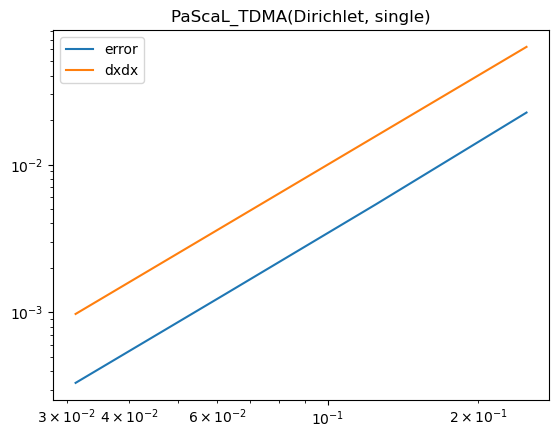

In [453]:
# single

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.022480059807686324, 0.005399285685504229, 0.0013382850460904277, 0.00033388987945403567])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, single)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

[2.05780541 2.01238312 2.00294116]


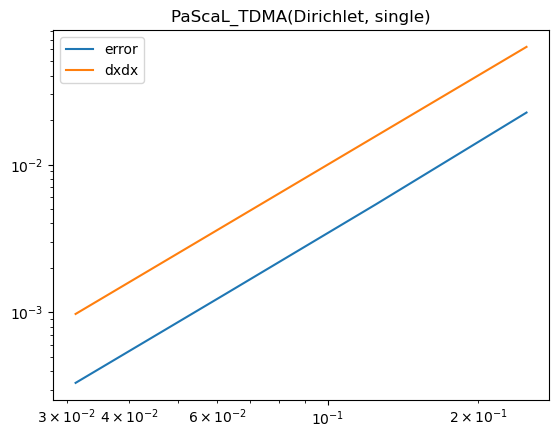

In [458]:
# many

dx_list = np.array([2/8, 2/16, 2/32, 2/64])
error_list = np.array([0.02248005980768629, 0.00539928568550424, 0.0013382850460904063, 0.0003338898794540554])

slope = ( np.log(error_list[1:]) - np.log(error_list[:-1]) ) / ( np.log(dx_list[1:]) - np.log(dx_list[:-1]) )
print(slope)

plt.title("PaScaL_TDMA(Dirichlet, single)")
plt.loglog(dx_list, error_list, label="error")
plt.loglog(dx_list, dx_list**2, label="dxdx")
plt.legend()

# PaScaL_TDMA (Periodic) single, many Performence

In [462]:
# single
times_1024 = np.array([2877, 1799, 944, 630])
times_2048 = np.array([12989, 7241, 3803, 2259])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_1024 = times_1024[0] / times_1024
speedup_2048 = times_2048[0] / times_2048

# efficiency 계산
efficiency_1024 = speedup_1024 / procs
efficiency_2048 = speedup_2048 / procs

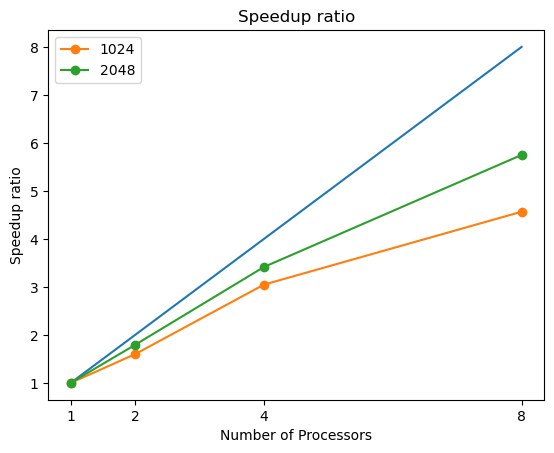

In [463]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_1024, "o-", label="1024")
plt.plot(procs, speedup_2048, "o-", label="2048")
plt.legend()

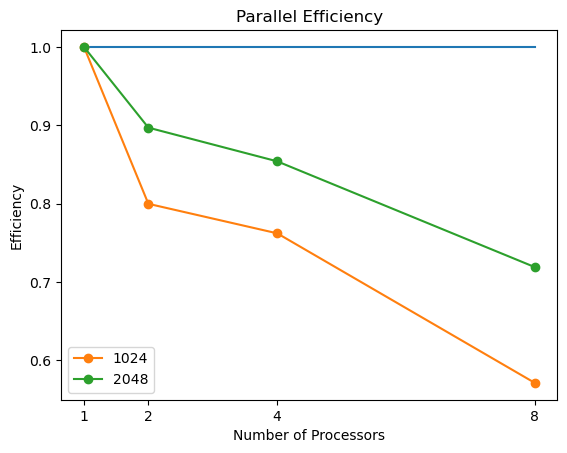

In [464]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_1024, "o-", label="1024")
plt.plot(procs, efficiency_2048, "o-", label="2048")
plt.legend()

In [468]:
# many
times_1024 = np.array([2877, 1735, 966, 595])
times_2048 = np.array([12989, 7425, 4265, 3044])

# 프로세서 개수
procs = np.array([1, 2, 4, 8])

# speed-up 계산
speedup_1024 = times_1024[0] / times_1024
speedup_2048 = times_2048[0] / times_2048

# efficiency 계산
efficiency_1024 = speedup_1024 / procs
efficiency_2048 = speedup_2048 / procs

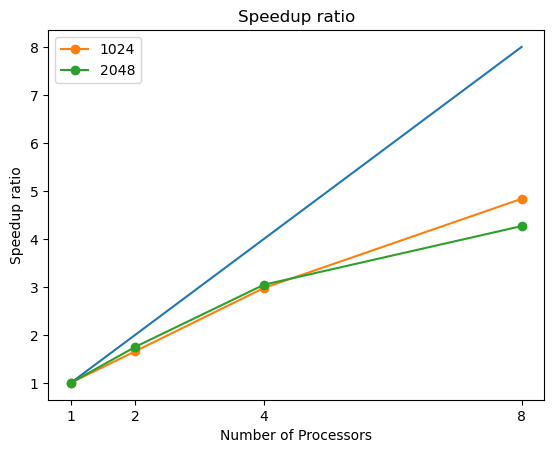

In [469]:
plt.title('Speedup ratio')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup ratio')
plt.plot(procs, procs)
plt.xticks([1, 2, 4, 8])
plt.plot(procs, speedup_1024, "o-", label="1024")
plt.plot(procs, speedup_2048, "o-", label="2048")
plt.legend()

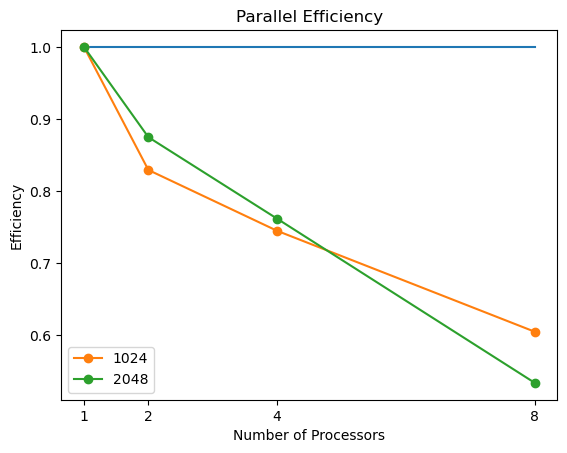

In [470]:
plt.title('Parallel Efficiency')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency')
plt.plot(procs, np.ones(procs.shape[0]))
plt.xticks([1, 2, 4, 8])
plt.plot(procs, efficiency_1024, "o-", label="1024")
plt.plot(procs, efficiency_2048, "o-", label="2048")
plt.legend()